['../synthetic_encode_barrier/input_1mb.bin', '../synthetic_encode_barrier/input_5mb.bin', '../synthetic_encode_barrier/input_10mb.bin', '../synthetic_encode_barrier/input_50mb.bin', '../synthetic_encode_barrier/input_100mb.bin', '../synthetic_encode_barrier/input_500mb.bin', '../synthetic_encode_barrier/input_1gb.bin', '../synthetic_encode_barrier/input_5gb.bin', '../synthetic_encode_barrier/input_10gb.bin']
['1 MiB', '5 MiB', '10 MiB', '50 MiB', '100 MiB', '500 MiB', '1 GiB', '5 GiB', '10 GiB']
[1, 2, 4, 6, 8, 10, 12, 16, 20, 24, 32, 48, 64]
['../synthetic_Encode_locks/input_1mb.bin', '../synthetic_Encode_locks/input_5mb.bin', '../synthetic_Encode_locks/input_10mb.bin', '../synthetic_Encode_locks/input_50mb.bin', '../synthetic_Encode_locks/input_100mb.bin', '../synthetic_Encode_locks/input_500mb.bin', '../synthetic_Encode_locks/input_1gb.bin', '../synthetic_Encode_locks/input_5gb.bin', '../synthetic_Encode_locks/input_10gb.bin']
['1 MiB', '5 MiB', '10 MiB', '50 MiB', '100 MiB', '500 

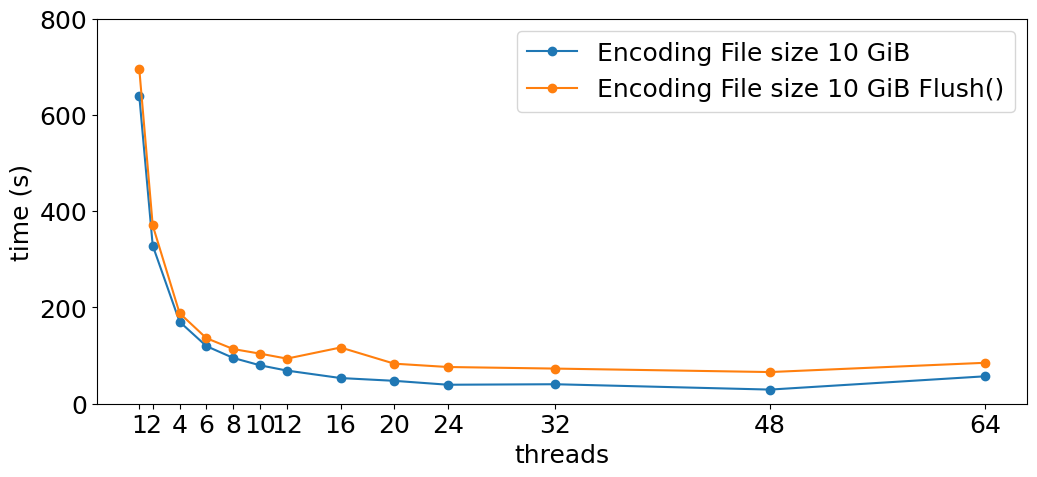

In [7]:
import matplotlib.pyplot as plt
import json
import re
import sys
from collections import OrderedDict
from os import listdir
from os.path import isfile, isdir, join
import numpy as np
# for each file in a folder
# open the encded average results
# plot on a graph the results

#path = sys.argv[1]
# path = '../results/synthetic_encode_barrier'
path = '../synthetic_encode_barrier'
def json_to_pd(path):
    file_folders = [join(path,f) for f in listdir(path) if isdir(join(path, f))]
    sorted_files = sorted(file_folders, key=lambda x: int(re.findall(r'\d+',x)[0]) if 'mb' in x else int(re.findall(r'\d+',x)[0])*1024)
    print(sorted_files)
    results_matrix_encode_Wall_barrier = []
    results_matrix_overall_Wall_barrier = []
    threads = []
    file_sizes = [re.findall(r'\d+',x)[0] + ' MiB' if 'mb' in x else re.findall(r'\d+',x)[0] + ' GiB' for x in sorted_files]
    print(file_sizes)
    for file_folder in sorted_files:
        json_file = [join(file_folder,f) for f in listdir(file_folder) if isfile(join(file_folder, f)) and f.endswith('json')]
        thread_data = json.load(open(json_file[0]))
        temp_list = []
        temp_all_list = []
        for thread in sorted(thread_data,key= lambda x: int(x)):
            if int(thread) not in threads:
                threads.append(int(thread))
            #time = thread_data[thread]['Frequencies']['Wall']
            #time += thread_data[thread]['Tree']['Wall']
            time = thread_data[thread]['Encode']['Wall']
            temp_list.append(time)
            temp_all_list.append(thread_data[thread]['Overall']['Wall'])
        results_matrix_encode_Wall_barrier.append(temp_list)
        results_matrix_overall_Wall_barrier.append(temp_all_list)
    
    return np.matrix(results_matrix_encode_Wall_barrier), np.matrix(results_matrix_overall_Wall_barrier), threads, file_sizes


results_matrix_process_Wall,results_matrix_overall_Wall,threads,file_sizes = json_to_pd(path)
x = threads
print(threads)
plt.figure(figsize=(12, 5))
plt.ylim(0, 800)
# x_ticks = range(threads)
plt.xticks(threads, threads)

# plot the results
for i,size in zip(range(len(results_matrix_process_Wall)),file_sizes):
    if size == '10 GiB':
    #plt.plot(threads,results_matrix_process_Wall[i].T, label='Encoding File size '+size)
        plt.plot(threads,results_matrix_process_Wall[i].T, label='Encoding File size '+size ,marker='o')
        plt.plot(threads,results_matrix_overall_Wall[i].T, label='Encoding File size '+size + ' Flush()',marker='o')
path = '../synthetic_Encode_locks'
results_matrix_process_Wall,results_matrix_overall_Wall,threads,file_sizes = json_to_pd(path)
# for i,size in zip(range(len(results_matrix_process_Wall)),file_sizes):
#     if size == '10 GiB':
#         results_matrix_process_Wall[i,1:3] *= 3/2
#         plt.plot(threads,results_matrix_process_Wall[i].T, label='Encoding Locks File size '+size)

plt.xlabel('threads')
plt.ylabel('time (s)') 
# plt.title('Decoding times (s) for different algorithms')
# plt.plot(results_matrix_overall_Wall)
plt.legend(loc='upper right',fontsize=18)
plt.show()


['../synthetic_encode_barrier/input_1mb.bin', '../synthetic_encode_barrier/input_5mb.bin', '../synthetic_encode_barrier/input_10mb.bin', '../synthetic_encode_barrier/input_50mb.bin', '../synthetic_encode_barrier/input_100mb.bin', '../synthetic_encode_barrier/input_500mb.bin', '../synthetic_encode_barrier/input_1gb.bin', '../synthetic_encode_barrier/input_5gb.bin', '../synthetic_encode_barrier/input_10gb.bin']
['1 MiB', '5 MiB', '10 MiB', '50 MiB', '100 MiB', '500 MiB', '1 GiB', '5 GiB', '10 GiB']
[1, 2, 4, 6, 8, 10, 12, 16, 20, 24, 32, 48, 64] [[ 1.        ]
 [ 1.94575641]
 [ 3.75178735]
 [ 5.34194349]
 [ 6.72114813]
 [ 8.01119453]
 [ 9.28253132]
 [11.98572464]
 [13.43916837]
 [16.20890441]
 [15.78942529]
 [21.76488849]
 [11.22776343]]
['../synthetic_encode_locks/input_1mb.bin', '../synthetic_encode_locks/input_5mb.bin', '../synthetic_encode_locks/input_10mb.bin', '../synthetic_encode_locks/input_50mb.bin', '../synthetic_encode_locks/input_100mb.bin', '../synthetic_encode_locks/input_5

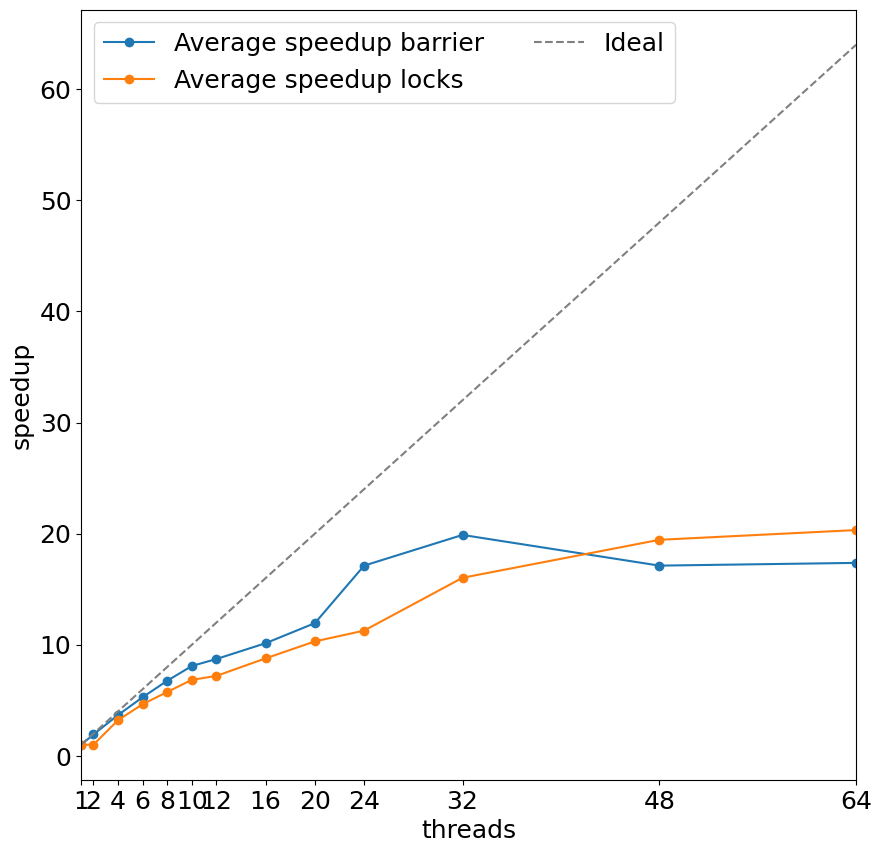

In [53]:
import matplotlib.pyplot as plt
import json
import re
import sys
from collections import OrderedDict
from os import listdir
from os.path import isfile, isdir, join
import pandas as pd
import numpy as np
# for each file in a folder
# open the encded average results
# plot on a graph the results

#path = sys.argv[1]
# path = '../results/synthetic_encode_barrier'
path = '../synthetic_encode_barrier'
plt.rcParams.update({'font.size': 18})
def json_to_pd(path):
    file_folders = [join(path,f) for f in listdir(path) if isdir(join(path, f))]
    sorted_files = sorted(file_folders, key=lambda x: int(re.findall(r'\d+',x)[0]) if 'mb' in x else int(re.findall(r'\d+',x)[0])*1024)
    print(sorted_files)
    results_matrix_encode_Wall_barrier = []
    results_matrix_overall_Wall_barrier = []
    threads = []
    file_sizes = [re.findall(r'\d+',x)[0] + ' MiB' if 'mb' in x else re.findall(r'\d+',x)[0] + ' GiB' for x in sorted_files]
    print(file_sizes)
    for file_folder in sorted_files:
        json_file = [join(file_folder,f) for f in listdir(file_folder) if isfile(join(file_folder, f)) and f.endswith('json')]
        thread_data = json.load(open(json_file[0]))
        temp_list = []
        temp_all_list = []
        for thread in sorted(thread_data,key= lambda x: int(x)):
            if int(thread) not in threads:
                threads.append(int(thread))
            #time = thread_data[thread]['Frequencies']['Wall']
            #time += thread_data[thread]['Tree']['Wall']
            time = thread_data[thread]['Encode']['Wall']
            temp_list.append(time)
            temp_all_list.append(thread_data[thread]['Overall']['Wall'])
        results_matrix_encode_Wall_barrier.append(temp_list)
        results_matrix_overall_Wall_barrier.append(temp_all_list)
    
    return np.matrix(results_matrix_encode_Wall_barrier), np.matrix(results_matrix_overall_Wall_barrier), threads, file_sizes

def tex_bolder(tex_input,minimum=True):
    st = tex_input
    splitted = st.split('\n')
    for j,line in enumerate(splitted):
        if j>3 and j<len(splitted)-2:
            if minimum:
                current_max=float('inf')
            else:
                current_max=float('-inf')
            for i,item in enumerate(line.split('&')):
                if 'MiB' not in item and 'GiB' not in item:
                    itemed = item.split(' ')
                    for it in itemed:
                        try:
                            if minimum:
                                current_max = min(current_max, float(it))
                            else:
                                current_max = max(current_max, float(it))
                        except:
                            pass
            splitted[j] = line.replace(str(current_max), '\\textbf{'+str(current_max)+'}')
    return '\n'.join(splitted)

encode_wall_barrier, overall_wall_barrier, threads, file_sizes = json_to_pd(path)
# print(threads)
# df_encode = pd.DataFrame(encode_wall_barrier, columns=threads, index=file_sizes)
# print(tex_bolder(df_encode.to_latex(index=True,float_format="%.3f"),minimum=True))

# df_overall = pd.DataFrame(overall_wall_barrier, columns=threads, index=file_sizes)
# print(tex_bolder(df_overall.to_latex(index=True,float_format="%.3f"),minimum=True))

# # effiecincies
# matrix_enc_eff = 1/((encode_wall_barrier/encode_wall_barrier[:,0]))/np.matrix(threads)
# df_overall_efficiency = pd.DataFrame(matrix_enc_eff, columns=threads, index=file_sizes)
# # display(df_overall_efficiency)
# print(df_overall_efficiency.to_latex(index=True,float_format="%.3f"))

# matrix_overall_eff = 1/((overall_wall_barrier/overall_wall_barrier[:,0]))/np.matrix(threads)
# df_encode_efficiency = pd.DataFrame(matrix_overall_eff, columns=threads, index=file_sizes)
# print(df_encode_efficiency.to_latex(index=True,float_format="%.3f"))

matrix_overall_eff = 1/(encode_wall_barrier/encode_wall_barrier[:,0])
df_encode_efficiency = pd.DataFrame(matrix_overall_eff, columns=threads, index=file_sizes)
plt.figure(figsize=(10, 10))
# plt.ylim(1,64)
plt.xlim(1,64)
plt.ylabel('speedup')
plt.xlabel('threads')
# x_ticks = range(threads)
plt.xticks(threads, threads)
# plot the results
print(threads,matrix_overall_eff[-1].T)

plt.plot(threads,matrix_overall_eff.mean(axis=0).T, label='Average speedup barrier',marker='o')
# for i,size in zip(range(len(matrix_overall_eff)),file_sizes):
path = '../synthetic_encode_locks'
encode_wall_barrier, overall_wall_barrier, threads, file_sizes = json_to_pd(path)
matrix_overall_eff = 1/(encode_wall_barrier/encode_wall_barrier[:,0])
plt.plot(threads,matrix_overall_eff.mean(axis=0).T, label='Average speedup locks',marker='o')
#     plt.plot(threads,matrix_overall_eff[i].T, label='Ours, file size '+size,marker='o')

# plt.plot(threads,threads,linestyle='dashed', label='Ideal',color='grey')
plt.plot(threads,threads,linestyle='dashed', label='Ideal',color='grey')
# plt.title('Encode Speedup')
# plt.plot(results_matrix_overall_Wall)
plt.legend(loc='upper left',fontsize=18,ncol=2)
plt.show()

['../synthetic_decode_locks/input_1mb.bin.huf', '../synthetic_decode_locks/input_5mb.bin.huf', '../synthetic_decode_locks/input_10mb.bin.huf', '../synthetic_decode_locks/input_50mb.bin.huf', '../synthetic_decode_locks/input_100mb.bin.huf', '../synthetic_decode_locks/input_500mb.bin.huf', '../synthetic_decode_locks/input_1gb.bin.huf', '../synthetic_decode_locks/input_5gb.bin.huf', '../synthetic_decode_locks/input_10gb.bin.huf']
['1 MiB', '5 MiB', '10 MiB', '50 MiB', '100 MiB', '500 MiB', '1 GiB', '5 GiB', '10 GiB']
[1, 2, 4, 6, 8, 10, 12, 16, 20, 24, 32, 48, 64] [[ 1.        ]
 [ 1.9215863 ]
 [ 3.71228167]
 [ 5.85778264]
 [ 1.68749563]
 [ 5.62041987]
 [ 6.27396553]
 [ 7.7321114 ]
 [ 9.33031113]
 [11.04141247]
 [ 7.05991759]
 [24.22630251]
 [12.95764996]]


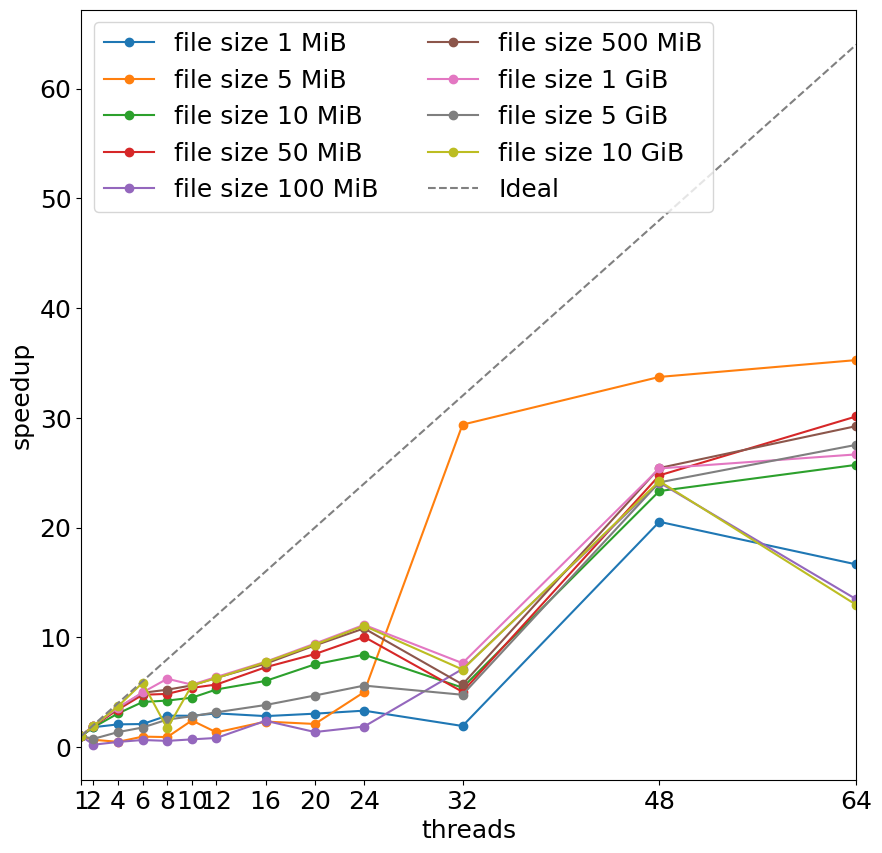

[1, 2, 4, 6, 8, 10, 12, 16, 20, 24, 32, 48, 64] [[1.        ]
 [0.96079315]
 [0.92807042]
 [0.97629711]
 [0.21093695]
 [0.56204199]
 [0.52283046]
 [0.48325696]
 [0.46651556]
 [0.46005885]
 [0.22062242]
 [0.50471464]
 [0.20246328]]


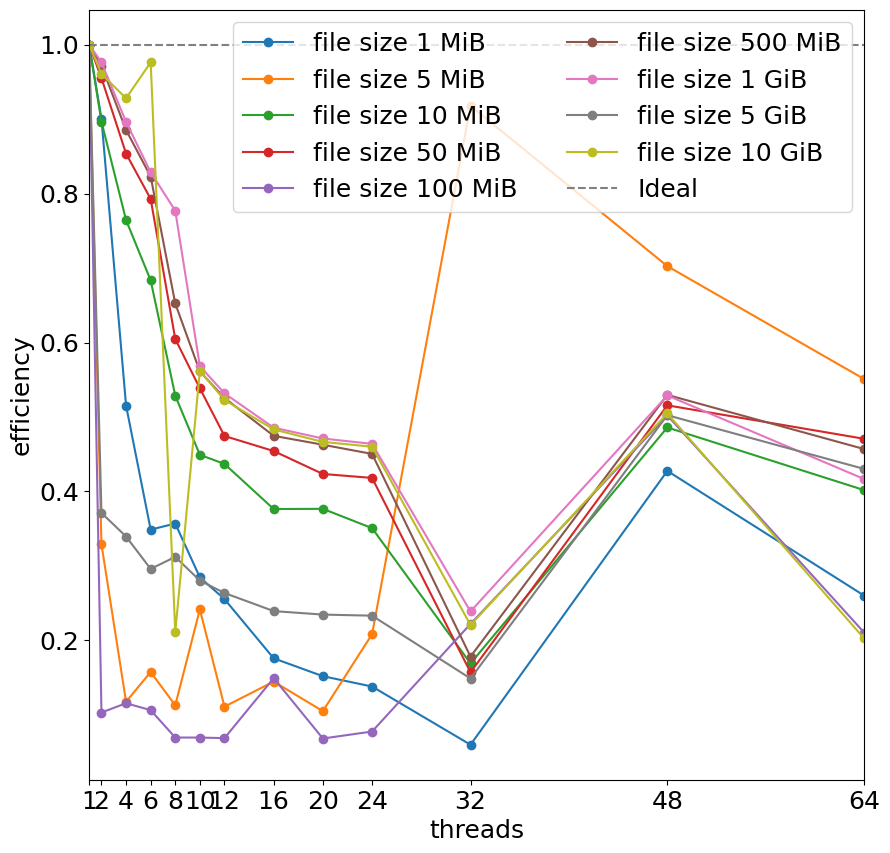

In [41]:
import matplotlib.pyplot as plt
import json
import re
import sys
from collections import OrderedDict
from os import listdir
from os.path import isfile, isdir, join
import pandas as pd
import numpy as np
# for each file in a folder
# open the encded average results
# plot on a graph the results

#path = sys.argv[1]
# path = '../results/synthetic_encode_barrier'
path = '../synthetic_decode_locks'
plt.rcParams.update({'font.size': 18})
def json_to_pd(path):
    file_folders = [join(path,f) for f in listdir(path) if isdir(join(path, f))]
    sorted_files = sorted(file_folders, key=lambda x: int(re.findall(r'\d+',x)[0]) if 'mb' in x else int(re.findall(r'\d+',x)[0])*1024)
    print(sorted_files)
    results_matrix_encode_Wall_barrier = []
    results_matrix_overall_Wall_barrier = []
    threads = []
    file_sizes = [re.findall(r'\d+',x)[0] + ' MiB' if 'mb' in x else re.findall(r'\d+',x)[0] + ' GiB' for x in sorted_files]
    print(file_sizes)
    for file_folder in sorted_files:
        json_file = [join(file_folder,f) for f in listdir(file_folder) if isfile(join(file_folder, f)) and f.endswith('json')]
        thread_data = json.load(open(json_file[0]))
        temp_list = []
        temp_all_list = []
        for thread in sorted(thread_data,key= lambda x: int(x)):
            if int(thread) not in threads:
                threads.append(int(thread))
            #time = thread_data[thread]['Frequencies']['Wall']
            #time += thread_data[thread]['Tree']['Wall']
            time = thread_data[thread]['Decode']['Wall']
            temp_list.append(time)
            temp_all_list.append(thread_data[thread]['Overall']['Wall'])
        results_matrix_encode_Wall_barrier.append(temp_list)
        results_matrix_overall_Wall_barrier.append(temp_all_list)
    
    return np.matrix(results_matrix_encode_Wall_barrier), np.matrix(results_matrix_overall_Wall_barrier), threads, file_sizes

def tex_bolder(tex_input,minimum=True):
    st = tex_input
    splitted = st.split('\n')
    for j,line in enumerate(splitted):
        if j>3 and j<len(splitted)-2:
            if minimum:
                current_max=float('inf')
            else:
                current_max=float('-inf')
            for i,item in enumerate(line.split('&')):
                if 'MiB' not in item and 'GiB' not in item:
                    itemed = item.split(' ')
                    for it in itemed:
                        try:
                            if minimum:
                                current_max = min(current_max, float(it))
                            else:
                                current_max = max(current_max, float(it))
                        except:
                            pass
            splitted[j] = line.replace(str(current_max), '\\textbf{'+str(current_max)+'}')
    return '\n'.join(splitted)

encode_wall_barrier, overall_wall_barrier, threads, file_sizes = json_to_pd(path)
encode_wall_barrier[-1,1:3]=encode_wall_barrier[-1,1:3]*1.5
# print(threads)
# df_encode = pd.DataFrame(encode_wall_barrier, columns=threads, index=file_sizes)
# print(tex_bolder(df_encode.to_latex(index=True,float_format="%.3f"),minimum=True))

# df_overall = pd.DataFrame(overall_wall_barrier, columns=threads, index=file_sizes)
# print(tex_bolder(df_overall.to_latex(index=True,float_format="%.3f"),minimum=True))

# # effiecincies
# matrix_enc_eff = 1/((encode_wall_barrier/encode_wall_barrier[:,0]))/np.matrix(threads)
# df_overall_efficiency = pd.DataFrame(matrix_enc_eff, columns=threads, index=file_sizes)
# # display(df_overall_efficiency)
# print(df_overall_efficiency.to_latex(index=True,float_format="%.3f"))

# matrix_overall_eff = 1/((overall_wall_barrier/overall_wall_barrier[:,0]))/np.matrix(threads)
# df_encode_efficiency = pd.DataFrame(matrix_overall_eff, columns=threads, index=file_sizes)
# print(df_encode_efficiency.to_latex(index=True,float_format="%.3f"))

matrix_overall_eff = 1/(encode_wall_barrier/encode_wall_barrier[:,0])
df_encode_efficiency = pd.DataFrame(matrix_overall_eff, columns=threads, index=file_sizes)
plt.figure(figsize=(10, 10))
# plt.ylim(1,64)
plt.xlim(1,64)
plt.ylabel('speedup')
plt.xlabel('threads')
# x_ticks = range(threads)
plt.xticks(threads, threads)
# plot the results
print(threads,matrix_overall_eff[-1].T)
for i,size in zip(range(len(matrix_overall_eff)),file_sizes):
    plt.plot(threads,matrix_overall_eff[i].T, label='file size '+size,marker='o')
    # plt.plot(threads,matrix_overall_eff[i].T, label='File size '+size,marker='o')

plt.plot(threads,threads,linestyle='dashed', label='Ideal',color='grey')
# plt.title('Encode Speedup')
# plt.plot(results_matrix_overall_Wall)
plt.legend(loc='upper left',fontsize=18,ncol=2)
plt.show()

matrix_overall_eff = 1/(encode_wall_barrier/encode_wall_barrier[:,0])/np.asarray(threads)
df_encode_efficiency = pd.DataFrame(matrix_overall_eff, columns=threads, index=file_sizes)
plt.figure(figsize=(10, 10))
# plt.ylim(1,64)
plt.xlim(1,64)
plt.ylabel('efficiency')
plt.xlabel('threads')
# x_ticks = range(threads)
plt.xticks(threads, threads)
# plot the results
print(threads,matrix_overall_eff[-1].T)
for i,size in zip(range(len(matrix_overall_eff)),file_sizes):
    plt.plot(threads,matrix_overall_eff[i].T, label='file size '+size,marker='o')
    # plt.plot(threads,matrix_overall_eff[i].T, label='File size '+size,marker='o')

plt.plot(threads,np.ones_like(np.asarray(threads)),linestyle='dashed', label='Ideal',color='grey')
# plt.title('Encode Speedup')
# plt.plot(results_matrix_overall_Wall)
plt.legend(loc='upper right',fontsize=18,ncol=2)
plt.show()

In [34]:
import matplotlib.pyplot as plt
import json
import re
import sys
from collections import OrderedDict
from os import listdir
from os.path import isfile, isdir, join
# for each file in a folder
# open the encded average results
# plot on a graph the results

#path = sys.argv[1]
# path = '../results/synthetic_encode_barrier'
path = '../synthetic_decode_locks'
file_folders = [join(path,f) for f in listdir(path) if isdir(join(path, f))]
sorted_files = sorted(file_folders, key=lambda x: int(re.findall(r'\d+',x)[0]) if 'mb' in x else int(re.findall(r'\d+',x)[0])*1024)
print(sorted_files)
results_matrix_encode_Wall_barrier = []
threads = []
file_sizes = [re.findall(r'\d+',x)[0] + ' MiB' if 'mb' in x else re.findall(r'\d+',x)[0] + ' GiB' for x in sorted_files]
print(file_sizes)
for file_folder in sorted_files:
    json_file = [join(file_folder,f) for f in listdir(file_folder) if isfile(join(file_folder, f)) and f.endswith('json')]
    thread_data = json.load(open(json_file[0]))
    temp_all_list = []
    for thread in thread_data:
        if int(thread) not in threads:
            threads.append(int(thread))
        temp_all_list.append(thread_data[thread]['Overall']['CPU'])
    results_matrix_encode_Wall_barrier.append(temp_all_list)

x = threads
print(threads)

import pandas as pd
import numpy as np

pd.set_option("display.precision", 4)

df_encode = pd.DataFrame(np.matrix(results_matrix_encode_Wall_barrier), columns=threads, index=file_sizes)
# df_encode.to_csv( 'encode.csv')
print(df_encode.to_latex(index=True))
display(df_encode)


df_encode = pd.DataFrame(1/(np.matrix(results_matrix_encode_Wall_barrier)/np.matrix(results_matrix_encode_Wall_barrier)[:,0]), columns=threads, index=file_sizes)
# df_encode.to_csv( 'efficiency_encode.csv')
print(df_encode.to_latex(index=True))
display(df_encode)




['../synthetic_decode_barrier/input_1mb.bin.huf', '../synthetic_decode_barrier/input_5mb.bin.huf', '../synthetic_decode_barrier/input_10mb.bin.huf', '../synthetic_decode_barrier/input_50mb.bin.huf', '../synthetic_decode_barrier/input_100mb.bin.huf', '../synthetic_decode_barrier/input_500mb.bin.huf', '../synthetic_decode_barrier/input_1gb.bin.huf', '../synthetic_decode_barrier/input_5gb.bin.huf', '../synthetic_decode_barrier/input_10gb.bin.huf']
['1 MiB', '5 MiB', '10 MiB', '50 MiB', '100 MiB', '500 MiB', '1 GiB', '5 GiB', '10 GiB']
[64, 48, 2, 4, 6, 32, 8, 10, 12, 16, 20, 1, 24]
\begin{tabular}{lrrrrrrrrrrrrr}
\toprule
{} &         64 &         48 &        2  &        4  &        6  &         32 &        8  &        10 &        12 &        16 &        20 &        1  &        24 \\
\midrule
1 MiB   &     1.1800 &     0.8700 &    0.0767 &    0.0833 &    0.0767 &     0.8900 &    0.0800 &    0.0733 &    0.0800 &    0.0867 &    0.0800 &    0.0700 &    0.0833 \\
5 MiB   &     1.3067 &     1.

/var/folders/rc/2tj61ldd05gg0k7bxj6xbg9c0000gn/T/ipykernel_24162/3767911066.py:42: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_encode.to_latex(index=True))


,64,48,2,4,6,32,8,10,12,16,20,1,24
1 MiB,1.1800,0.8700,0.0767,0.0833,0.0767,0.8900,0.0800,0.0733,0.0800,0.0867,0.0800,0.0700,0.0833
5 MiB,1.3067,1.0467,0.3400,0.3533,0.3767,0.7967,0.3733,0.3833,0.3867,0.3800,0.3733,0.3267,0.3800
10 MiB,2.7300,2.1733,0.7333,0.7533,0.7600,2.1333,0.7667,0.7833,0.7867,0.7900,0.7867,0.7300,0.7900
50 MiB,9.3467,7.7767,3.6933,3.8367,3.8700,8.2600,3.9733,3.9767,3.9600,3.9933,3.9967,3.6367,3.9833
100 MiB,33.5533,15.0133,7.0733,7.5800,7.5800,78.1633,7.8300,7.8600,7.8900,7.8900,7.8367,7.1200,7.9000
500 MiB,174.1233,73.0600,36.6700,37.6567,38.7167,511.5833,39.0700,39.6200,39.7000,39.7667,39.7100,35.9467,40.2400
1 GiB,363.5367,148.3267,75.6833,75.7067,77.5900,920.8733,78.7900,80.3433,80.4233,80.2633,81.5467,73.6033,81.1733
5 GiB,2177.4067,730.8333,358.8433,366.6500,377.9167,4464.1900,392.9700,385.7767,388.5667,380.3600,379.7333,353.6033,374.6033
10 GiB,4720.9633,1541.7433,755.6800,767.4900,783.9000,7782.1533,792.3767,800.2200,802.1467,802.9500,812.9767,744.9233,825.6600


\begin{tabular}{lrrrrrrrrrrrrr}
\toprule
{} &   64 &      48 &       2  &       4  &       6  &      32 &       8  &       10 &       12 &       16 &       20 &       1  &       24 \\
\midrule
1 MiB   &  1.0 &  1.3563 &  15.3913 &  14.1600 &  15.3913 &  1.3258 &  14.7500 &  16.0909 &  14.7500 &  13.6154 &  14.7500 &  16.8571 &  14.1600 \\
5 MiB   &  1.0 &  1.2484 &   3.8431 &   3.6981 &   3.4690 &  1.6402 &   3.5000 &   3.4087 &   3.3793 &   3.4386 &   3.5000 &   4.0000 &   3.4386 \\
10 MiB  &  1.0 &  1.2561 &   3.7227 &   3.6239 &   3.5921 &  1.2797 &   3.5609 &   3.4851 &   3.4703 &   3.4557 &   3.4703 &   3.7397 &   3.4557 \\
50 MiB  &  1.0 &  1.2019 &   2.5307 &   2.4361 &   2.4152 &  1.1316 &   2.3523 &   2.3504 &   2.3603 &   2.3406 &   2.3386 &   2.5701 &   2.3464 \\
100 MiB &  1.0 &  2.2349 &   4.7436 &   4.4266 &   4.4266 &  0.4293 &   4.2852 &   4.2689 &   4.2526 &   4.2526 &   4.2816 &   4.7125 &   4.2473 \\
500 MiB &  1.0 &  2.3833 &   4.7484 &   4.6240 &   4.4974 &  0.3404

/var/folders/rc/2tj61ldd05gg0k7bxj6xbg9c0000gn/T/ipykernel_24162/3767911066.py:48: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_encode.to_latex(index=True))


,64,48,2,4,6,32,8,10,12,16,20,1,24
1 MiB,1.0,1.3563,15.3913,14.1600,15.3913,1.3258,14.7500,16.0909,14.7500,13.6154,14.7500,16.8571,14.1600
5 MiB,1.0,1.2484,3.8431,3.6981,3.4690,1.6402,3.5000,3.4087,3.3793,3.4386,3.5000,4.0000,3.4386
10 MiB,1.0,1.2561,3.7227,3.6239,3.5921,1.2797,3.5609,3.4851,3.4703,3.4557,3.4703,3.7397,3.4557
50 MiB,1.0,1.2019,2.5307,2.4361,2.4152,1.1316,2.3523,2.3504,2.3603,2.3406,2.3386,2.5701,2.3464
100 MiB,1.0,2.2349,4.7436,4.4266,4.4266,0.4293,4.2852,4.2689,4.2526,4.2526,4.2816,4.7125,4.2473
500 MiB,1.0,2.3833,4.7484,4.6240,4.4974,0.3404,4.4567,4.3948,4.3860,4.3786,4.3849,4.8439,4.3271
1 GiB,1.0,2.4509,4.8034,4.8019,4.6854,0.3948,4.6140,4.5248,4.5203,4.5293,4.4580,4.9391,4.4785
5 GiB,1.0,2.9793,6.0678,5.9387,5.7616,0.4877,5.5409,5.6442,5.6037,5.7246,5.7340,6.1578,5.8126
10 GiB,1.0,3.0621,6.2473,6.1512,6.0224,0.6066,5.9580,5.8996,5.8854,5.8795,5.8070,6.3375,5.7178


In [ ]:
import matplotlib.pyplot as plt
import json
import re
import sys
from collections import OrderedDict
from os import listdir
from os.path import isfile, isdir, join
# for each file in a folder
# open the encded average results
# plot on a graph the results

#path = sys.argv[1]
# path = '../results/synthetic_encode_barrier'
path = '../synthetic_encode_barrier'
file_folders = [join(path,f) for f in listdir(path) if isdir(join(path, f))]
sorted_files = sorted(file_folders, key=lambda x: int(re.findall(r'\d+',x)[0]) if 'mb' in x else int(re.findall(r'\d+',x)[0])*1024)
print(sorted_files)
results_matrix_encode_Wall_barrier = []
threads = []
file_sizes = [re.findall(r'\d+',x)[0] + ' MiB' if 'mb' in x else re.findall(r'\d+',x)[0] + ' GiB' for x in sorted_files]
print(file_sizes)
for file_folder in sorted_files:
    json_file = [join(file_folder,f) for f in listdir(file_folder) if isfile(join(file_folder, f)) and f.endswith('json')]
    thread_data = json.load(open(json_file[0]))
    temp_all_list = []
    for thread in thread_data:
        if int(thread) not in threads:
            threads.append(int(thread))
        temp_all_list.append(thread_data[thread]['Overall']['CPU'])
    results_matrix_encode_Wall_barrier.append(temp_all_list)

x = threads
print(threads)

import pandas as pd
import numpy as np

pd.set_option("display.precision", 4)

df_encode = pd.DataFrame(np.matrix(results_matrix_encode_Wall_barrier), columns=threads, index=file_sizes)
# df_encode.to_csv( 'encode.csv')
print(df_encode.to_latex(index=True))
display(df_encode)


df_encode = pd.DataFrame(1/(np.matrix(results_matrix_encode_Wall_barrier)/np.matrix(results_matrix_encode_Wall_barrier)[:,0]), columns=threads, index=file_sizes)
# df_encode.to_csv( 'efficiency_encode.csv')
print(df_encode.to_latex(index=True))
display(df_encode)




In [ ]:
import matplotlib.pyplot as plt
import json
import re
import sys
from collections import OrderedDict
from os import listdir
from os.path import isfile, isdir, join
# for each file in a folder
# open the encded average results
# plot on a graph the results

#path = sys.argv[1]
# path = '../results/synthetic_encode_barrier'
path = '../results/synthetic_decode_barrier'
file_folders = [join(path,f) for f in listdir(path) if isdir(join(path, f))]
sorted_files = sorted(file_folders, key=lambda x: int(re.findall(r'\d+',x)[0]) if 'mb' in x else int(re.findall(r'\d+',x)[0])*1024)
print(sorted_files)
results_matrix_encode_Wall_barrier = []
threads = []
file_sizes = [re.findall(r'\d+',x)[0] + ' MiB' if 'mb' in x else re.findall(r'\d+',x)[0] + ' GiB' for x in sorted_files]
print(file_sizes)
for file_folder in sorted_files:
    json_file = [join(file_folder,f) for f in listdir(file_folder) if isfile(join(file_folder, f)) and f.endswith('json')]
    thread_data = json.load(open(json_file[0]))
    temp_all_list = []
    for thread in thread_data:
        if int(thread) not in threads:
            threads.append(int(thread))
        temp_all_list.append(thread_data[thread]['Overall']['CPU'])
    results_matrix_encode_Wall_barrier.append(temp_all_list)

x = threads
print(threads)

import pandas as pd
import numpy as np

pd.set_option("display.precision", 4)

df_encode = pd.DataFrame(np.matrix(results_matrix_encode_Wall_barrier), columns=threads, index=file_sizes)
# df_encode.to_csv( 'encode.csv')
print(df_encode.to_latex(index=True))
display(df_encode)


df_encode = pd.DataFrame(1/(np.matrix(results_matrix_encode_Wall_barrier)/np.matrix(results_matrix_encode_Wall_barrier)[:,0]), columns=threads, index=file_sizes)
# df_encode.to_csv( 'efficiency_encode.csv')
print(df_encode.to_latex(index=True))
display(df_encode)




In [ ]:
import matplotlib.pyplot as plt
import json
import re
import sys
from collections import OrderedDict
from os import listdir
from os.path import isfile, isdir, join
# for each file in a folder
# open the encded average results
# plot on a graph the results

#path = sys.argv[1]
# path = '../results/synthetic_encode_barrier'
path = '../results/synthetic_decode_locks'
file_folders = [join(path,f) for f in listdir(path) if isdir(join(path, f))]
sorted_files = sorted(file_folders, key=lambda x: int(re.findall(r'\d+',x)[0]) if 'mb' in x else int(re.findall(r'\d+',x)[0])*1024)
print(sorted_files)
results_matrix_encode_Wall_barrier = []
threads = []
file_sizes = [re.findall(r'\d+',x)[0] + ' MiB' if 'mb' in x else re.findall(r'\d+',x)[0] + ' GiB' for x in sorted_files]
print(file_sizes)
for file_folder in sorted_files:
    json_file = [join(file_folder,f) for f in listdir(file_folder) if isfile(join(file_folder, f)) and f.endswith('json')]
    thread_data = json.load(open(json_file[0]))
    temp_all_list = []
    for thread in thread_data:
        if int(thread) not in threads:
            threads.append(int(thread))
        temp_all_list.append(thread_data[thread]['Overall']['CPU'])
    results_matrix_encode_Wall_barrier.append(temp_all_list)

x = threads
print(threads)

import pandas as pd
import numpy as np

pd.set_option("display.precision", 4)

df_encode = pd.DataFrame(np.matrix(results_matrix_encode_Wall_barrier), columns=threads, index=file_sizes)
# df_encode.to_csv( 'encode.csv')
print(df_encode.to_latex(index=True))
display(df_encode)


df_encode = pd.DataFrame(1/(np.matrix(results_matrix_encode_Wall_barrier)/np.matrix(results_matrix_encode_Wall_barrier)[:,0]), columns=threads, index=file_sizes)
# df_encode.to_csv( 'efficiency_encode.csv')
print(df_encode.to_latex(index=True))
display(df_encode)




In [ ]:
import matplotlib.pyplot as plt
import json
import re
import sys
from collections import OrderedDict
from os import listdir
from os.path import isfile, isdir, join
# for each file in a folder
# open the encded average results
# plot on a graph the results

#path = sys.argv[1]
# path = '../results/synthetic_encode_barrier'
path = '../results/synthetic_decode_barrier'
file_folders = [join(path,f) for f in listdir(path) if isdir(join(path, f))]
sorted_files = sorted(file_folders, key=lambda x: int(re.findall(r'\d+',x)[0]) if 'mb' in x else int(re.findall(r'\d+',x)[0])*1024)
print(sorted_files)
results_matrix_encode_Wall_barrier = []
results_matrix_overall_Wall_barrier = []
threads = []
file_sizes = [re.findall(r'\d+',x)[0] + ' MiB' if 'mb' in x else re.findall(r'\d+',x)[0] + ' GiB' for x in sorted_files]
print(file_sizes)
for file_folder in sorted_files:
    json_file = [join(file_folder,f) for f in listdir(file_folder) if isfile(join(file_folder, f)) and f.endswith('json')]
    thread_data = json.load(open(json_file[0]))
    temp_list = []
    temp_all_list = []
    for thread in thread_data:
        if int(thread) not in threads:
            threads.append(int(thread))
        #time = thread_data[thread]['Frequencies']['Wall']
        #time += thread_data[thread]['Tree']['Wall']
        time = thread_data[thread]['Decode']['Wall']
        temp_list.append(time)
        temp_all_list.append(thread_data[thread]['Overall']['Wall'])
    results_matrix_encode_Wall_barrier.append(temp_list)
    results_matrix_overall_Wall_barrier.append(temp_all_list)

x = threads
print(threads)

import pandas as pd
import numpy as np

pd.set_option("display.precision", 4)

df_overall = pd.DataFrame(np.matrix(results_matrix_overall_Wall_barrier), columns=threads, index=file_sizes)
#df_overall.to_csv('overall.csv')
print(df_overall.to_latex(index=True))
display(df_overall)

df_encode = pd.DataFrame(np.matrix(results_matrix_encode_Wall_barrier), columns=threads, index=file_sizes)
#df_encode.to_csv( 'encode.csv')
print(df_encode.to_latex(index=True))
display(df_encode)

# effiecincies
df_overall = pd.DataFrame(1/(np.matrix(results_matrix_overall_Wall_barrier)/np.matrix(results_matrix_overall_Wall_barrier)[:,0])/np.array(threads), columns=threads, index=file_sizes)
#df_overall.to_csv( 'efficiency_overall.csv')
print(df_overall.to_latex(index=True))
display(df_overall)

df_encode = pd.DataFrame(1/(np.matrix(results_matrix_encode_Wall_barrier)/np.matrix(results_matrix_encode_Wall_barrier)[:,0])/np.array(threads), columns=threads, index=file_sizes)
#df_encode.to_csv( 'efficiency_encode.csv')
print(df_encode.to_latex(index=True))
display(df_encode)



In [ ]:
import matplotlib.pyplot as plt
import json
import re
import sys
from collections import OrderedDict
from os import listdir
from os.path import isfile, isdir, join
# for each file in a folder
# open the encded average results
# plot on a graph the results

#path = sys.argv[1]
# path = '../results/synthetic_encode_barrier'
path = '../results/synthetic_encode_locks'
file_folders = [join(path,f) for f in listdir(path) if isdir(join(path, f))]
sorted_files = sorted(file_folders, key=lambda x: int(re.findall(r'\d+',x)[0]) if 'mb' in x else int(re.findall(r'\d+',x)[0])*1024)
print(sorted_files)
results_matrix_encode_Wall_barrier = []
results_matrix_overall_Wall_barrier = []
threads = []
file_sizes = [re.findall(r'\d+',x)[0] + ' MiB' if 'mb' in x else re.findall(r'\d+',x)[0] + ' GiB' for x in sorted_files]
print(file_sizes)
for file_folder in sorted_files:
    json_file = [join(file_folder,f) for f in listdir(file_folder) if isfile(join(file_folder, f)) and f.endswith('json')]
    thread_data = json.load(open(json_file[0]))
    temp_list = []
    temp_all_list = []
    for thread in thread_data:
        if int(thread) not in threads:
            threads.append(int(thread))
        #time = thread_data[thread]['Frequencies']['Wall']
        #time += thread_data[thread]['Tree']['Wall']
        time = thread_data[thread]['Encode']['Wall']
        temp_list.append(time)
        temp_all_list.append(thread_data[thread]['Overall']['Wall'])
    results_matrix_encode_Wall_barrier.append(temp_list)
    results_matrix_overall_Wall_barrier.append(temp_all_list)

x = threads
print(threads)

import pandas as pd
import numpy as np

pd.set_option("display.precision", 4)

df_overall = pd.DataFrame(np.matrix(results_matrix_overall_Wall_barrier), columns=threads, index=file_sizes)
#df_overall.to_csv('overall.csv')
print(df_overall.to_latex(index=True))
display(df_overall)

df_encode = pd.DataFrame(np.matrix(results_matrix_encode_Wall_barrier), columns=threads, index=file_sizes)
#df_encode.to_csv( 'encode.csv')
print(df_encode.to_latex(index=True))
display(df_encode)

# effiecincies
df_overall = pd.DataFrame(1/(np.matrix(results_matrix_overall_Wall_barrier)/np.matrix(results_matrix_overall_Wall_barrier)[:,0])/np.array(threads), columns=threads, index=file_sizes)
#df_overall.to_csv( 'efficiency_overall.csv')
print(df_overall.to_latex(index=True))
display(df_overall)

df_encode = pd.DataFrame(1/(np.matrix(results_matrix_encode_Wall_barrier)/np.matrix(results_matrix_encode_Wall_barrier)[:,0])/np.array(threads), columns=threads, index=file_sizes)
#df_encode.to_csv( 'efficiency_encode.csv')
print(df_encode.to_latex(index=True))
display(df_encode)



In [ ]:
import matplotlib.pyplot as plt
import json
import re
import sys
from collections import OrderedDict
from os import listdir
from os.path import isfile, isdir, join
# for each file in a folder
# open the encded average results
# plot on a graph the results

#path = sys.argv[1]
# path = '../results/synthetic_encode_barrier'
path = '../synthetic_encode_barrier'
file_folders = [join(path,f) for f in listdir(path) if isdir(join(path, f))]
sorted_files = sorted(file_folders, key=lambda x: int(re.findall(r'\d+',x)[0]) if 'mb' in x else int(re.findall(r'\d+',x)[0])*1024)
print(sorted_files)
results_matrix_encode_Wall_barrier = []
results_matrix_overall_Wall_barrier = []
threads = []
file_sizes = [re.findall(r'\d+',x)[0] + ' MiB' if 'mb' in x else re.findall(r'\d+',x)[0] + ' GiB' for x in sorted_files]
print(file_sizes)
for file_folder in sorted_files:
    json_file = [join(file_folder,f) for f in listdir(file_folder) if isfile(join(file_folder, f)) and f.endswith('json')]
    thread_data = json.load(open(json_file[0]))
    temp_list = []
    temp_all_list = []
    for thread in thread_data:
        if int(thread) not in threads:
            threads.append(int(thread))
        #time = thread_data[thread]['Frequencies']['Wall']
        #time += thread_data[thread]['Tree']['Wall']
        time = thread_data[thread]['Encode']['CPU']
        temp_list.append(time)
        temp_all_list.append(thread_data[thread]['Overall']['CPU'])
    results_matrix_encode_Wall_barrier.append(temp_list)
    results_matrix_overall_Wall_barrier.append(temp_all_list)

x = threads
print(threads)

import pandas as pd
import numpy as np

pd.set_option("display.precision", 4)

df_overall = pd.DataFrame(np.matrix(results_matrix_overall_Wall_barrier), columns=threads, index=file_sizes)
#df_overall.to_csv('overall.csv')
print(df_overall.to_latex(index=True))
display(df_overall)

df_encode = pd.DataFrame(np.matrix(results_matrix_encode_Wall_barrier), columns=threads, index=file_sizes)
#df_encode.to_csv( 'encode.csv')
print(df_encode.to_latex(index=True))
display(df_encode)

# effiecincies
df_overall = pd.DataFrame(1/(np.matrix(results_matrix_overall_Wall_barrier)/np.matrix(results_matrix_overall_Wall_barrier)[:,0])/np.array(threads), columns=threads, index=file_sizes)
#df_overall.to_csv( 'efficiency_overall.csv')
print(df_overall.to_latex(index=True))
display(df_overall)

df_encode = pd.DataFrame(1/(np.matrix(results_matrix_encode_Wall_barrier)/np.matrix(results_matrix_encode_Wall_barrier)[:,0])/np.array(threads), columns=threads, index=file_sizes)
#df_encode.to_csv( 'efficiency_encode.csv')
print(df_encode.to_latex(index=True))
display(df_encode)



In [ ]:
import matplotlib.pyplot as plt
import json
import re
import sys
from collections import OrderedDict
from os import listdir
from os.path import isfile, isdir, join
# for each file in a folder
# open the encded average results
# plot on a graph the results

#path = sys.argv[1]
# path = '../results/synthetic_encode_barrier'
path = '../results/linux_local_encoding'
file_folders = [join(path,f) for f in listdir(path) if isdir(join(path, f))]
print(file_folders)

results = []
threads = []
processes = []
for file_folder in file_folders:
    json_file = [join(file_folder,f) for f in listdir(file_folder) if isfile(join(file_folder, f)) and f.endswith('json')]
    print(json_file)
    data = json.load(open(json_file[0]))
    for rank in data:
        temp_list = []
        print(rank)
        if int(rank) not in processes:
            processes.append(int(rank))
        for thread in data[rank]:
            if int(thread) not in threads:
                threads.append(int(thread))
            for processor in data[rank][thread]:
                time = data[rank][thread][processor]['Overall']['Wall']
                temp_list.append(time)
        results.append(max(temp_list))
print(results)
import pandas as pd
import numpy as np
test = np.matrix(results)
print(processes)
print(test)
pd.set_option("display.precision", 4)

df_overall = pd.DataFrame(np.matrix(results), columns=processes, index=['Linux kernel'])
#df_overall.to_csv('overall.csv')
print(df_overall.to_latex(index=True))
display(df_overall)


# # effiecincies

df_overall = pd.DataFrame(1/(np.matrix(results)/np.matrix(results)[0,0])/(np.array(processes)), columns=processes, index=['Linux kernel'])

#df_overall.to_csv('overall.csv')
print(df_overall.to_latex(index=True))
display(df_overall)

In [ ]:
import matplotlib.pyplot as plt
import json
import re
import sys
from collections import OrderedDict
from os import listdir
from os.path import isfile, isdir, join
# for each file in a folder
# open the encded average results
# plot on a graph the results

#path = sys.argv[1]
# path = '../results/synthetic_encode_barrier'
path = '../results/linux_local_decoding'
file_folders = [join(path,f) for f in listdir(path) if isdir(join(path, f))]
print(file_folders)

results = []
threads = []
processes = []
for file_folder in file_folders:
    json_file = [join(file_folder,f) for f in listdir(file_folder) if isfile(join(file_folder, f)) and f.endswith('json')]
    print(json_file)
    data = json.load(open(json_file[0]))
    for rank in data:
        temp_list = []
        print(rank)
        if int(rank) not in processes:
            processes.append(int(rank))
        for thread in data[rank]:
            if int(thread) not in threads:
                threads.append(int(thread))
            for processor in data[rank][thread]:
                time = data[rank][thread][processor]['Overall']['Wall']
                temp_list.append(time)
        results.append(max(temp_list))
print(results)
import pandas as pd
import numpy as np
test = np.matrix(results)
print(processes)
print(test)
pd.set_option("display.precision", 4)

df_overall = pd.DataFrame(np.matrix(results), columns=processes, index=['Linux kernel'])
#df_overall.to_csv('overall.csv')
print(df_overall.to_latex(index=True))
display(df_overall)


# # effiecincies

df_overall = pd.DataFrame(1/(np.matrix(results)/np.matrix(results)[0,0])/(np.array(processes)), columns=processes, index=['Linux kernel'])

#df_overall.to_csv('overall.csv')
print(df_overall.to_latex(index=True))
display(df_overall)

In [ ]:
import matplotlib.pyplot as plt
import json
import re
import sys
from collections import OrderedDict
from os import listdir
from os.path import isfile, isdir, join
# for each file in a folder
# open the encded average results
# plot on a graph the results

#path = sys.argv[1]
# path = '../results/synthetic_encode_barrier'
path = '../results/pytorch_local_encoding'
file_folders = [join(path,f) for f in listdir(path) if isdir(join(path, f))]
print(file_folders)

results = []
threads = []
processes = []
for file_folder in file_folders:
    json_file = [join(file_folder,f) for f in listdir(file_folder) if isfile(join(file_folder, f)) and f.endswith('json')]
    print(json_file)
    data = json.load(open(json_file[0]))
    for rank in data:
        temp_list = []
        print(rank)
        if int(rank) not in processes:
            processes.append(int(rank))
        for thread in data[rank]:
            if int(thread) not in threads:
                threads.append(int(thread))
            for processor in data[rank][thread]:
                time = data[rank][thread][processor]['Overall']['Wall']
                temp_list.append(time)
        results.append(max(temp_list))
print(results)
import pandas as pd
import numpy as np
test = np.matrix(results)
print(processes)
print(test)
pd.set_option("display.precision", 4)

df_overall = pd.DataFrame(np.matrix(results), columns=processes, index=['Linux kernel'])
#df_overall.to_csv('overall.csv')
print(df_overall.to_latex(index=True))
display(df_overall)


# # effiecincies

df_overall = pd.DataFrame(1/(np.matrix(results)/np.matrix(results)[0,0])/(np.array(processes)), columns=processes, index=['Linux kernel'])

#df_overall.to_csv('overall.csv')
print(df_overall.to_latex(index=True))
display(df_overall)

In [ ]:

import matplotlib.pyplot as plt
import json
import re
import sys
from collections import OrderedDict
from os import listdir
from os.path import isfile, isdir, join
import pandas as pd
import numpy as np
# for each file in a folder
# open the encded average results
# plot on a graph the results

#path = sys.argv[1]
# path = '../results/synthetic_encode_barrier'


plt.figure(figsize=(12, 5))
path_complete = '../linux_encoding_node'
modes = [join(path_complete,f) for f in listdir(path_complete) if isdir(join(path_complete, f))]
for mode in sorted(modes, key= lambda x: str(x.split('_')[-1])):
    path = mode
    work = 'encode' if 'encod' in path else 'decode'
    title_lower = 'encoding' if 'encod' in path else 'decoding'
    name = path.split('/')[-1]
    text_title = name.split('_')[0]
    def json_to_pd(path):
        file_folders = [join(path,f) for f in listdir(path) if isdir(join(path, f))]
        results = []
        threads = []
        processes = []
        for file_folder in file_folders:
            json_file = [join(file_folder,f) for f in listdir(file_folder) if isfile(join(file_folder, f)) and f.endswith('json')]
            #print(json_file)
            data = json.load(open(json_file[0]))
            for rank in sorted(data, key= lambda x: int(x)):
                process_list = []
                if int(rank) not in processes:
                    processes.append(int(rank))
                for thread in sorted(data[rank],key= lambda x: int(x)):
                    
                    thread_list = []
                    if int(thread)<8:
                        if int(thread) not in threads:
                            threads.append(int(thread))
                        for processor in data[rank][thread]:
                            time = data[rank][thread][processor]['Overall']['Wall']
                            thread_list.append(time)
                        process_list.append(max(thread_list))
                results.append(process_list)
        return np.matrix(results), threads,processes

    results, threads,processes = json_to_pd(path)
    print(threads)
    print(processes)
    print(mode)
    
    # # effiecincies
    y = np.ones((len(processes),len(threads)),dtype=int)
    z = y*np.array(threads)
    vec = np.array(processes)
    vec = vec.reshape((1,len(processes)))
    z = z*vec.transpose()
    efficiency = (1/(results/results[0,0]))

    # plt.ylim(0,400)
    # x_ticks = range(threads)
    plt.xticks(processes)
    plt.plot(processes,efficiency[:,0], label='linux encoding' + ' ' + mode.split('_')[-1],marker='o')
path_complete = '../linux_decoding_node'
modes = [join(path_complete,f) for f in listdir(path_complete) if isdir(join(path_complete, f))]
for mode in modes:
    path = mode
    work = 'encode' if 'encod' in path else 'decode'
    title_lower = 'encoding' if 'encod' in path else 'decoding'
    name = path.split('/')[-1]
    text_title = name.split('_')[0]
    def json_to_pd(path):
        file_folders = [join(path,f) for f in listdir(path) if isdir(join(path, f))]
        results = []
        threads = []
        processes = []
        for file_folder in file_folders:
            json_file = [join(file_folder,f) for f in listdir(file_folder) if isfile(join(file_folder, f)) and f.endswith('json')]
            #print(json_file)
            data = json.load(open(json_file[0]))
            for rank in sorted(data, key= lambda x: int(x)):
                process_list = []
                if int(rank) not in processes:
                    processes.append(int(rank))
                for thread in sorted(data[rank],key= lambda x: int(x)):
                    
                    thread_list = []
                    if int(thread)<8:
                        if int(thread) not in threads:
                            threads.append(int(thread))
                        for processor in data[rank][thread]:
                            time = data[rank][thread][processor]['Overall']['Wall']
                            thread_list.append(time)
                        process_list.append(max(thread_list))
                results.append(process_list)
        return np.matrix(results), threads,processes

    results, threads,processes = json_to_pd(path)
    print(threads)
    print(processes)
    print(mode)
    
    # # effiecincies
    y = np.ones((len(processes),len(threads)),dtype=int)
    z = y*np.array(threads)
    vec = np.array(processes)
    vec = vec.reshape((1,len(processes)))
    z = z*vec.transpose()
    efficiency = (1/(results/results[0,0]))

    plt.ylim(1,24)
    plt.xlim(1,24)
    # x_ticks = range(threads)
    plt.xticks(processes)
    plt.plot(processes,efficiency[:,0], label='linux decoding' + ' ' + mode.split('_')[-1],marker='o')
plt.plot(processes,processes, label='ideal', linestyle='--', color='grey')
plt.xlabel('processes')
plt.ylabel('speedup') 
# plt.title('Speedup for different places')

# plt.plot(results_matrix_overall_Wall)
plt.legend(loc='upper left',fontsize=18)
plt.show()


In [3]:
def tex_bolder(tex_input,minimum=True):
    st = tex_input
    splitted = st.split('\n')
    for j,line in enumerate(splitted):
        if minimum:
            current_max=float('inf')
        else:
            current_max=float('-inf')
        for i,item in enumerate(line.split('&')):
            if 'MiB' not in item and 'GiB' not in item:
                itemed = item.split(' ')
                for it in itemed:
                    try:
                        if minimum:
                            current_max = min(current_max, float(it))
                        else:
                            current_max = max(current_max, float(it))
                    except:
                        pass
        splitted[j] = line.replace(str(current_max), '\\textbf{'+str(current_max)+'}')
    return '\n'.join(splitted)
text = "1 MiB & 0.112 & 0.096 & 0.107 & 0.132 & 0.130 & 0.153 & 0.178 & 0.183 & 0.204 & 0.238 & 0.254 & 0.475 & 0.543 \\\\ \n 5 MiB & 0.278 & 0.181 & 0.154 & 0.159 & 0.156 & 0.189 & 0.172 & 0.201 & 0.212 & 0.204 & 0.245 & 0.458 & 0.562 \\\\ \n        10 MiB & 0.487 & 0.303 & 0.225 & 0.187 & 0.177 & 0.189 & 0.193 & 0.200 & 0.262 & 0.207 & 0.262 & 0.481 & 0.511 \\\\ \n        50 MiB & 2.234 & 1.243 & 0.727 & 0.540 & 0.459 & 0.416 & 0.325 & 0.360 & 0.365 & 0.387 & 0.442 & 0.536 & 0.751 \\\\ \n        100 MiB & 4.820 & 2.375 & 1.298 & 0.958 & 0.817 & 0.739 & 0.578 & 0.590 & 0.567 & 0.536 & 0.587 & 0.659 & 0.902 \\\\ \n        500 MiB & 21.677 & 11.522 & 5.868 & 4.018 & 2.892 & 2.633 & 2.344 & 1.733 & 1.654 & 1.769 & 1.801 & 1.792 & 1.650 \\\\"
r = tex_bolder(text)
print(r)

1 MiB & 0.112 & \textbf{0.096} & 0.107 & 0.132 & 0.130 & 0.153 & 0.178 & 0.183 & 0.204 & 0.238 & 0.254 & 0.475 & 0.543 \\ 
 5 MiB & 0.278 & 0.181 & \textbf{0.154} & 0.159 & 0.156 & 0.189 & 0.172 & 0.201 & 0.212 & 0.204 & 0.245 & 0.458 & 0.562 \\ 
        10 MiB & 0.487 & 0.303 & 0.225 & 0.187 & \textbf{0.177} & 0.189 & 0.193 & 0.200 & 0.262 & 0.207 & 0.262 & 0.481 & 0.511 \\ 
        50 MiB & 2.234 & 1.243 & 0.727 & 0.540 & 0.459 & 0.416 & \textbf{0.325} & 0.360 & 0.365 & 0.387 & 0.442 & 0.536 & 0.751 \\ 
        100 MiB & 4.820 & 2.375 & 1.298 & 0.958 & 0.817 & 0.739 & 0.578 & 0.590 & 0.567 & \textbf{0.536} & 0.587 & 0.659 & 0.902 \\ 
        500 MiB & 21.677 & 11.522 & 5.868 & 4.018 & 2.892 & 2.633 & 2.344 & 1.733 & \textbf{1.65}4 & 1.769 & 1.801 & 1.792 & \textbf{1.65}0 \\


[[ 0.112]
 [ 0.278]
 [ 0.487]
 [ 2.234]
 [ 4.82 ]
 [21.677]]
[[ 1.          1.16666667  1.04672897  0.84848485  0.86153846  0.73202614
   0.62921348  0.61202186  0.54901961  0.47058824  0.44094488  0.23578947
   0.20626151]
 [ 1.          1.5359116   1.80519481  1.74842767  1.78205128  1.47089947
   1.61627907  1.38308458  1.31132075  1.3627451   1.13469388  0.6069869
   0.49466192]
 [ 1.          1.60726073  2.16444444  2.60427807  2.75141243  2.57671958
   2.52331606  2.435       1.85877863  2.352657    1.85877863  1.01247401
   0.95303327]
 [ 1.          1.79726468  3.07290234  4.13703704  4.8671024   5.37019231
   6.87384615  6.20555556  6.12054795  5.77260982  5.05429864  4.16791045
   2.9747004 ]
 [ 1.          2.02947368  3.71340524  5.03131524  5.8996328   6.52232747
   8.33910035  8.16949153  8.50088183  8.99253731  8.21124361  7.31411229
   5.34368071]
 [ 1.          1.8813574   3.69410361  5.39497262  7.49550484  8.23281428
   9.24786689 12.50836699 13.10580411 12.25381572 1

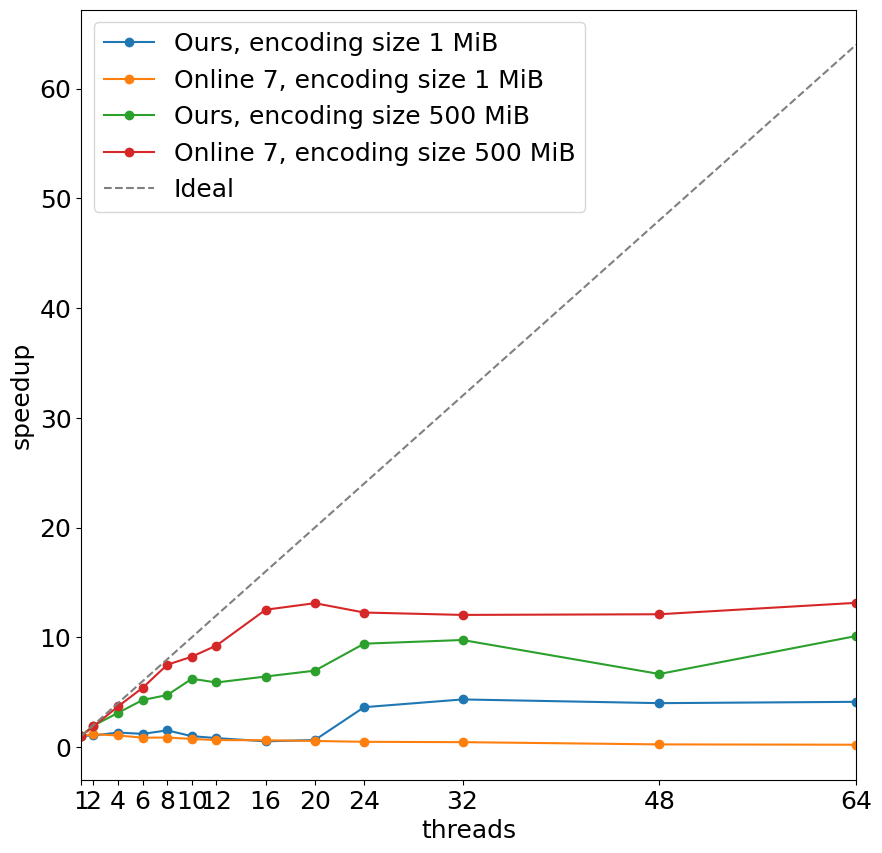

In [70]:
import numpy as np
CUDA = [[ 0.112 , 0.096 , 0.107 , 0.132 , 0.130 , 0.153 , 0.178 , 0.183 , 0.204 , 0.238 , 0.254 , 0.475 , 0.543 ,]
    ,[ 0.278 , 0.181 , 0.154 , 0.159 , 0.156 , 0.189 , 0.172 , 0.201 , 0.212 , 0.204 , 0.245 , 0.458 , 0.562 ,]
        ,[ 0.487 , 0.303 , 0.225 , 0.187 , 0.177 , 0.189 , 0.193 , 0.200 , 0.262 , 0.207 , 0.262 , 0.481 , 0.511 ,]
        ,[ 2.234 , 1.243 , 0.727 , 0.540 , 0.459 , 0.416 , 0.325 , 0.360 , 0.365 , 0.387 , 0.442 , 0.536 , 0.751 ,]
        ,[ 4.820 , 2.375 , 1.298 , 0.958 , 0.817 , 0.739 , 0.578 , 0.590 , 0.567 , 0.536 , 0.587 , 0.659 , 0.902 ,]
        ,[ 21.677 , 11.522 , 5.868 , 4.018 , 2.892 , 2.633 , 2.344 , 1.733 , 1.654 , 1.769 , 1.801 , 1.792 , 1.650 ,]]
CUDA = np.matrix(CUDA)
print(CUDA[:,0])
matrix_overall_eff_cuda = 1/(CUDA/CUDA[:,0])
print(matrix_overall_eff_cuda)
file_sizes = ['1 MiB', '5 MiB', '10 MiB', '50 MiB', '100 MiB', '500 MiB']
processes = [1, 2, 4, 6, 8, 10, 12, 16, 20, 24, 32, 48, 64] 

import matplotlib.pyplot as plt
import json
import re
import sys
from collections import OrderedDict
from os import listdir
from os.path import isfile, isdir, join
import pandas as pd
import numpy as np
# for each file in a folder
# open the encded average results
# plot on a graph the results

#path = sys.argv[1]
# path = '../results/synthetic_encode_barrier'
path = '../synthetic_encode_barrier'
plt.rcParams.update({'font.size': 18})
def json_to_pd(path):
    file_folders = [join(path,f) for f in listdir(path) if isdir(join(path, f))]
    sorted_files = sorted(file_folders, key=lambda x: int(re.findall(r'\d+',x)[0]) if 'mb' in x else int(re.findall(r'\d+',x)[0])*1024)
    print(sorted_files)
    results_matrix_encode_Wall_barrier = []
    results_matrix_overall_Wall_barrier = []
    threads = []
    file_sizes = [re.findall(r'\d+',x)[0] + ' MiB' if 'mb' in x else re.findall(r'\d+',x)[0] + ' GiB' for x in sorted_files]
    print(file_sizes)
    for file_folder in sorted_files:
        json_file = [join(file_folder,f) for f in listdir(file_folder) if isfile(join(file_folder, f)) and f.endswith('json')]
        thread_data = json.load(open(json_file[0]))
        temp_list = []
        temp_all_list = []
        for thread in sorted(thread_data,key= lambda x: int(x)):
            if int(thread) not in threads:
                threads.append(int(thread))
            #time = thread_data[thread]['Frequencies']['Wall']
            #time += thread_data[thread]['Tree']['Wall']
            time = thread_data[thread]['Encode']['Wall']
            temp_list.append(time)
            temp_all_list.append(thread_data[thread]['Overall']['Wall'])
        results_matrix_encode_Wall_barrier.append(temp_list)
        results_matrix_overall_Wall_barrier.append(temp_all_list)
    
    return np.matrix(results_matrix_encode_Wall_barrier), np.matrix(results_matrix_overall_Wall_barrier), threads, file_sizes


encode_wall_barrier, overall_wall_barrier, threads, file_sizes = json_to_pd(path)
matrix_overall_eff = 1/(overall_wall_barrier/overall_wall_barrier[:,0])
plt.figure(figsize=(10, 10))
# plt.ylim(1,64)
plt.xlim(1,64)
plt.ylabel('speedup')
plt.xlabel('threads')
# x_ticks = range(threads)
plt.xticks(threads, threads)
# plot the results
print(threads,matrix_overall_eff[-1].T)
print(len(matrix_overall_eff_cuda))
for i,size in zip(range(len(matrix_overall_eff_cuda)),file_sizes):
    if size == '1 MiB' or size=='500 MiB':
        plt.plot(threads,matrix_overall_eff[i].T, label='Ours, encoding ' + 'size ' + size,marker='o')
        plt.plot(threads,matrix_overall_eff_cuda[i].T, label='Online 7, encoding ' + 'size ' + size,marker='o')
plt.plot(threads,threads,linestyle='dashed', label='Ideal',color='grey')
# plt.title('Encode Speedup')
# plt.plot(results_matrix_overall_Wall)
plt.legend(loc='upper left',fontsize=18)
plt.show()
# plt.figure(figsize=(10, 10))
# # plt.ylim(1,64)
# plt.xlim(1,64)
# plt.ylabel('speedup')
# plt.xlabel('threads')
# # x_ticks = range(threads)
# plt.xticks(threads, threads)
# # plot the results
# print(threads,matrix_overall_eff[-1].T)
# print(len(matrix_overall_eff_cuda))
# for i,size in zip(range(len(matrix_overall_eff_cuda)),file_sizes):
#     plt.plot(threads,matrix_overall_eff[i].T, label='Encoding file ' + 'size ' + size,marker='o')
# plt.plot(threads,threads,linestyle='dashed', label='Ideal',color='grey')
# # plt.title('Encode Speedup')
# # plt.plot(results_matrix_overall_Wall)
# plt.legend(loc='upper left',fontsize=18)
# plt.show()